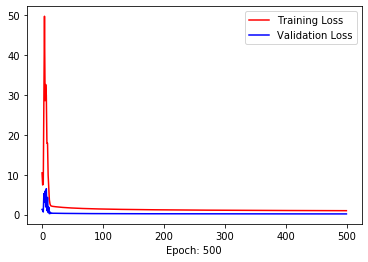

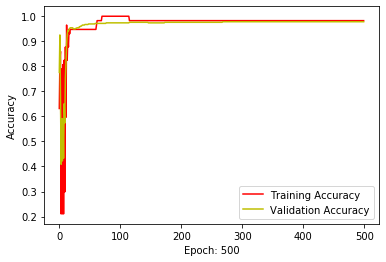

0.9824561403508771
0.9333333333333333
1.0


In [5]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Reading the dataset as .csv file
df=pd.read_csv("C:/Users/win/Downloads/wdbc.csv")

#Dropping first column of dataset
df.drop('col_id',axis=1,inplace=True)

#Mapping of Values M,B to 0,1 respectively
df['Target']=df.replace(to_replace='M',value=1)
df['Target']=df.replace(to_replace='B',value=0)

df_X=df.iloc[:,1:]
df_Y=df.iloc[:,0:1]

#Normalising the dataset 
x=df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_norm = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_norm)

#Splitting the dataset into training(80%),testing(10%) and validation(10%) sets respectively
train,test=train_test_split(df,train_size=0.8,shuffle=False)
validate,test=train_test_split(test,train_size=0.5,shuffle=False)

#X_train is the training dataset
#Y_train  forms the set of labels to all data in x_train
X_train=train[train.columns[1:32]]
Y_train=train[train.columns[0:1]]

#X_test is the testing dataset
#Y_test forms the set of labels to all data in x_test
X_test=test[test.columns[1:32]]
Y_test=test[test.columns[0:1]]

#X_validate is the validation dataset
#Y_validate forms the set of labels to all data in x_validate
X_validate=validate[validate.columns[1:32]]
Y_validate=validate[validate.columns[0:1]]

#initializing some random values to hyperparameters i.e epochs and learningrate
epochs = 500
learningrate = 0.6

#Initializing lists and other variables
losstrack = []
losstrack_validate=[]
accuracyTrack=[]
accuracyTrack_validate=[]
m = X_train.shape[1]
mv=X_validate.shape[1]
w = np.random.randn(X_train.shape[1], 1)*0.01
b = 0

#define sigmoid function which return a value that can be mapped to target values(0,1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#define predict function to get predicted values
def predict(df_X,w,b):
    z = np.dot(df_X,w) + b
    return np.round(sigmoid(z))



def cost_fun(df_X,df_Y,w,m):
    
    #Linear Regression Equation
    z = np.dot(df_X,w) + b
    
    predict = sigmoid(z)
    
    #Cost function for finding error for entire training set
    cost = -np.sum(np.multiply(np.log(predict), df_Y) + np.multiply((1 - df_Y), np.log(1 - predict)))/m
    return cost,predict

#iterating through the number of epochs
for epoch in range(epochs):
    
    #calculating training set and validation set cost.Error for entire training set is given by Cost function.
    train_cost,train_predict=cost_fun(X_train,Y_train,w,m)
    validate_cost,validate_predict=cost_fun(X_validate,Y_validate,w,mv)
    
    
    losstrack.append(np.squeeze(train_cost))
    losstrack_validate.append(np.squeeze(validate_cost))
    
    #calculating Training and Validation sets accuracy
    act=accuracy_score(Y_train,train_predict.round())
    accuracyTrack.append(np.squeeze(act))
    acv=accuracy_score(Y_validate,validate_predict.round())
    accuracyTrack_validate.append(np.squeeze(acv))
    
    #Partial derivative of loss functiom wrt z
    dz = train_predict-Y_train
    
    dw = (1 / m) * np.dot(X_train.T, dz)
    db = float((1 / m) * np.sum(dz))
    
    #Updating weights and biases
    w = w - learningrate * dw
    b = b - learningrate * db

#Plotting training and validation loss function  
fig = plt.figure()
plt.plot(losstrack,'r',label='Training Loss')
plt.plot(losstrack_validate,'b',label='Validation Loss')
plt.xlabel('Epoch: '+str(epochs))
plt.legend()
plt.show()
fig.savefig('Fig27.png')

#Plotting training and validation accuracy using accuracy values vs epoch 
fig = plt.figure()
plt.plot(accuracyTrack_validate,'r',label='Training Accuracy')    
plt.plot(accuracyTrack,'y',label='Validation Accuracy')
plt.xlabel('Epoch: '+str(epochs))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Saving output as a .png file
fig.savefig('Fig28.png')

#Calculating Accuracy,Precision and Recall evaluation
predict_val=predict(X_test,w,b)
print(accuracy_score(Y_test,predict_val))
print(precision_score(Y_test,predict_val))
print(recall_score(Y_test,predict_val))
